In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
# Loading a dataset: MNIST
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%
100.0%
100.0%
100.0%


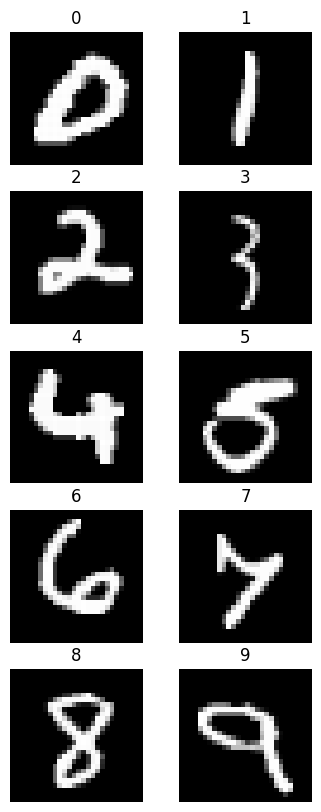

In [6]:
# Iterating and Visualizing the Dataset
figure = plt.figure(figsize=(4, 10))
cols, rows = 2, 5
label = -1
for i in range(1, cols * rows + 1):
    while (label != (i-1)):
        sample_idx = torch.randint(len(training_data), size=(1,)).item()
        img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
# Creating a custom dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    # The __init__ method is run once when instantiating the Dataset object.
    # img_dir is the directory where the images are stored
    # annotations_file could be a CSV file with image file names and labels
    # example: img1.jpg, 0
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    # The __len__ method returns the number of samples in our dataset.
    def __len__(self):
        return len(self.img_labels)

    # The __getitem__ method loads and returns a sample from the dataset at the given index idx.
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


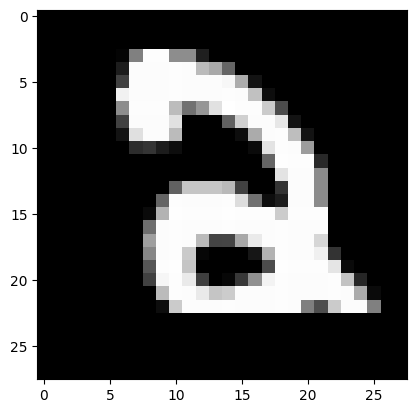

Label: 2


In [9]:
# Preparing the data for training with DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterate through the DataLoader
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()    # removes all dimensions of size 1
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64, 10])


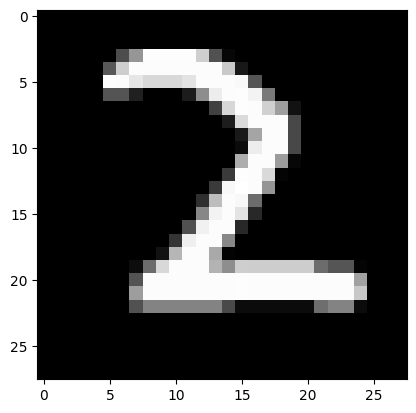

Label: tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


In [10]:
# Transforming the dataset
from torchvision.transforms import Lambda

ds = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
# Lambda transforms apply any user-defined lambda function.
# Here, we define a function to turn the integer into a one-hot encoded tensor.
# It first creates a zero tensor of size 10 (the number of labels in MNIST),
# and calls scatter_ which assigns a value=1 on the index as given by the label y.
# Preparing the data for training with DataLoaders

ds_dl = DataLoader(ds, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(ds_dl))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")